# Mari bekerja dengan audio

## Bagian 1: Audio, Visualisasi, dan Fading

---

### Import Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import os
import wave

**Penjelasan:**
- `import numpy as np` : Library numpy digunakan untuk melakukan operasi matematika pada array.
- `import matplotlib.pyplot as plt` : Library matplotlib digunakan untuk membuat plot grafik.
- `import os` : Library os digunakan untuk melakukan operasi pada sistem operasi seperti misalnya membaca file.
- `import wave` : Library wave digunakan untuk membaca file audio.

In [2]:
file_path = os.path.join(os.getcwd(), 'file_suara', 'harvard.wav')
# Cara lain, namun tidak di rekomendasikan:
# file_path = "/Users/martinmanullang/Developer/if4021-handson/data/harvard.wav"

# Mengecek apakah file ada atau tidak
if not os.path.exists(file_path):
    print(f"File {file_path} not found.")
    exit()

In [3]:
with wave.open(file_path, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_data = np.frombuffer(frames, dtype='int16')
    sampling_rate = wav_file.getframerate()
    
    # informasi channel
    n_channels = wav_file.getnchannels()

**Penjelasan:**
- `wave.open` : digunakan untuk membuka file audio.
- `r` adalah mode pembacaan file audio. `r` berarti read.
- kita mengkombinasikannya dengan `with` dan `as` agar file audio tertutup secara otomatis setelah selesai digunakan.
- `frames = wav_file.readframes(-1)`
    - `readframes(-1)` : digunakan untuk membaca semua frame audio.
- `np.frombuffer` : digunakan untuk mengubah frame audio menjadi array numpy.
    - `dtype='int16'` : digunakan untuk menentukan tipe data array numpy. Dalam hal ini, audio akan diubah menjadi array dengan tipe data int16. Mengapa 16? Karena audio yang kita gunakan adalah audio 16-bit.
- `wav_file.getframerate()` : digunakan untuk mendapatkan sampling rate dari audio.
- `wav_file.getnchannels()` : digunakan untuk mendapatkan jumlah channel dari audio.




In [4]:
print(f"Isi dari sound_data: {sound_data}")
print(f"Panjang dari sound_data: {len(sound_data)}")
print(f"Sampling rate: {sampling_rate}")
print(f"Jumlah channel: {n_channels}")

Isi dari sound_data: [  0   0   0 ... -58 -61 -60]
Panjang dari sound_data: 1619016
Sampling rate: 44100
Jumlah channel: 2


### Membagi Data Audio Stereo menjadi 2 Data

**Mengapa perlu dilakukan pemotongan?**
- Karena data audio yang ada berupa data stereo (memiliki 2 channel)
- Sehingga, kita harus memisahkan data audio tersebut menjadi 2 channel yang berbeda.

In [5]:
sound_data = sound_data.reshape(-1, n_channels)
print(f"Shape dari `sound_data` setelah di reshape: {sound_data.shape}")

data_audio_kiri = sound_data[:, 0]
data_audio_kanan = sound_data[:, 1]

print(f"Panjang Audio Kiri: {len(data_audio_kiri)}")
print(f"Panjang Audio Kanan: {len(data_audio_kanan)}")

Shape dari `sound_data` setelah di reshape: (809508, 2)
Panjang Audio Kiri: 809508
Panjang Audio Kanan: 809508


Penjelasan `sound_data = sound_data.reshape(-1, n_channels)`:
- `.reshape` digunakan untuk mengubah bentuk array
- `-1` digunakan untuk menentukan jumlah baris yang tidak diketahui. Dalam hal ini, kita tidak mengetahui jumlah baris yang dibutuhkan.

### Mari Memvisualisasi Audio

In [6]:
panjang_audio_sampel = len(data_audio_kiri)
print(f"Panjang Audio Sampel: {panjang_audio_sampel}")

panjang_audio_detik = panjang_audio_sampel / sampling_rate
print(f"Panjang Audio Detik: {panjang_audio_detik}")

# Membuat sumbu waktu
time_axis = np.linspace(0, panjang_audio_detik, panjang_audio_sampel)

Panjang Audio Sampel: 809508
Panjang Audio Detik: 18.356190476190477


Memvisualisasikan pada matplotlib

```python
plt.subplots(2, 1, figsize=(18, 5))
```

**Penjelasan:**
- `plt.subplots(2, 1, figsize=(18, 5))` : digunakan untuk membuat 2 plot dalam 1 baris.
    - `2` : jumlah plot yang akan dibuat.
    - `1` : jumlah kolom plot yang akan dibuat.
    - `figsize=(18, 5)` : digunakan untuk menentukan ukuran plot yang akan dibuat.

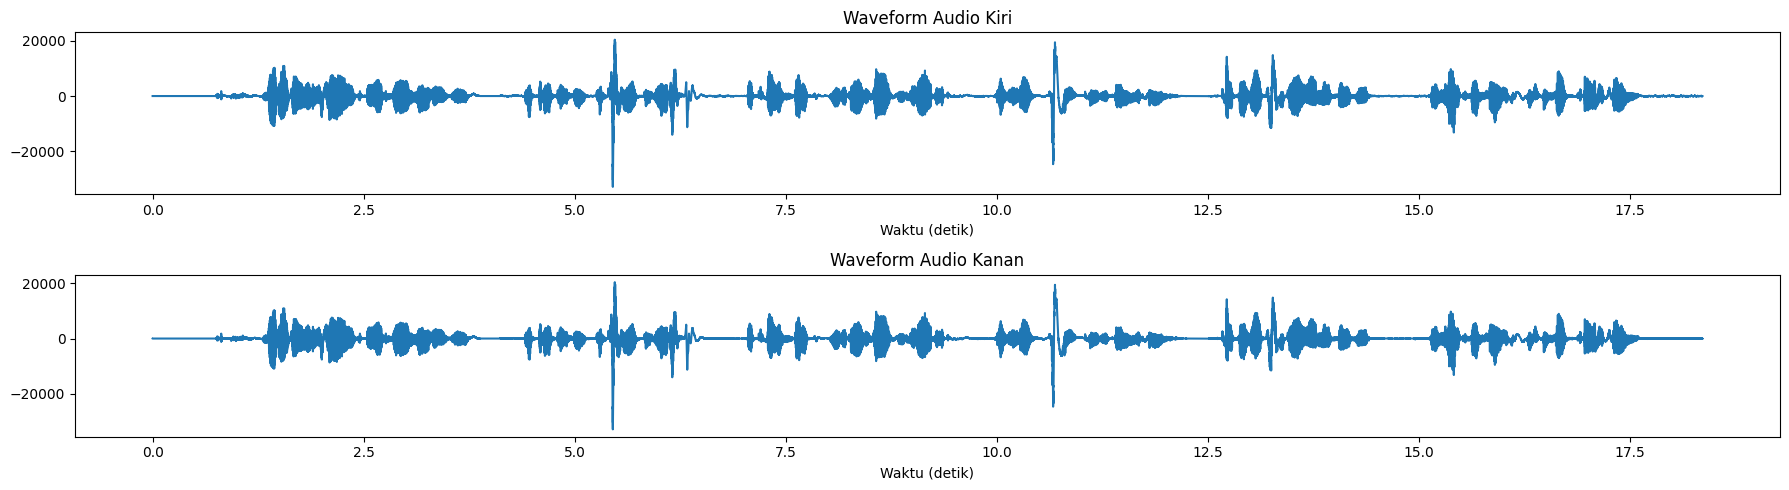

In [7]:
ax, fig = plt.subplots(2, 1, figsize=(18, 5)) # 2,1 artinya 2 baris, 1 kolom
fig[0].plot(time_axis, data_audio_kiri, label='Kiri')
fig[0].set_title('Waveform Audio Kiri')
fig[0].set_xlabel('Waktu (detik)')
fig[1].plot(time_axis, data_audio_kanan, label='Kanan')
fig[1].set_title('Waveform Audio Kanan')
fig[1].set_xlabel('Waktu (detik)')
plt.tight_layout()
plt.show()

Variabel `time_axis` adalah sumbu x yang akan digunakan untuk memvisualisasikan audio. Cara membuat `time_axis` adalah sebagai berikut:
- Tentukan panjang audio dalam detik dengan cara `panjang_audio = len(sound_data) / sampling_rate`.
- Buat array numpy yang berisi nilai waktu mulai dari 0 sampai panjang audio dengan cara `time_axis = np.linspace(0., panjang_audio, len(sound_data))`.


### Mari Membuat Spectogram

In [8]:
import librosa
import librosa.display

- `librosa` untuk memuat file audio
- `librosa.display` untuk menampilkan spectogram

In [9]:
file_path = os.path.join(os.getcwd(), 'file_suara', 'harvard.wav')

In [10]:
# cara membaca file audio menggunakan librosa

data_audio, sr = librosa.load(file_path)
S = librosa.stft(data_audio)
S_db = librosa.amplitude_to_db(np.abs(S))

In [11]:
print(f"Sampling Rate: {sr}")

Sampling Rate: 22050


**Penjelasan:**
- fungsi `librosa.load(file_path)` digunakan untuk memuat audio. Dan mengembalikan dua buah return, yaitu:
    - `data_audio` : data audio.
    - `sr` : sampling rate dari audio.
- `librosa.stft` : digunakan untuk menghitung Short-Time Fourier Transform (STFT) dari audio.
- `librosa.amplitude_to_db` : digunakan untuk mengubah amplitudo audio menjadi decibel (dB).
- Sampling rate pada librosa menunjukkan hanya 1 channel saja sehingga berbeda dengan pembacaan `wave` (yaitu, 44100Hz)

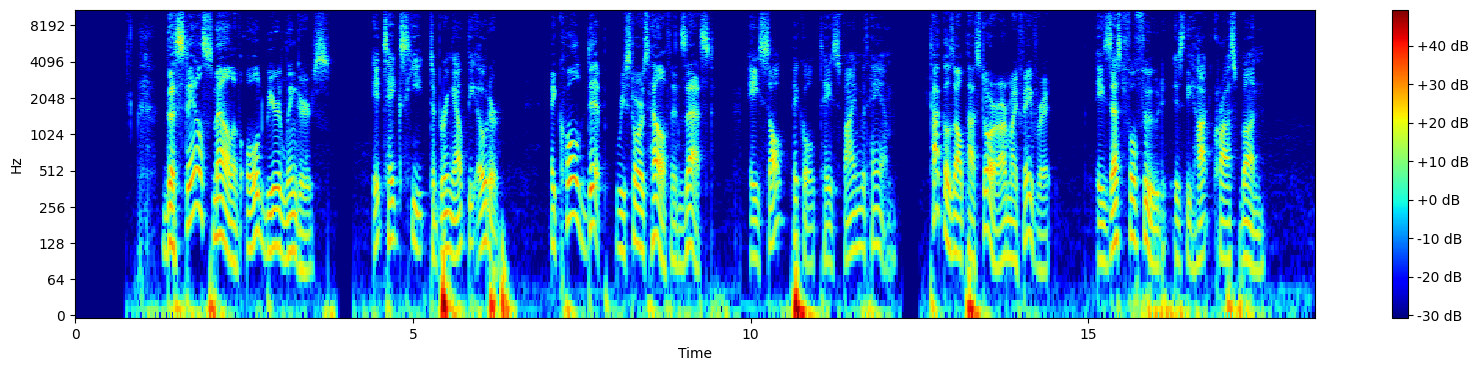

In [12]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='jet')
plt.colorbar(format='%+2.0f dB')
plt.show()

**Penjelasan:**
- `librosa.display.specshow` : digunakan untuk menampilkan spektrogram audio.
    - `librosa.amplitude_to_db(np.abs(S))` : digunakan untuk mengubah amplitudo audio menjadi decibel (dB).
    - `sr=sr` : digunakan untuk menentukan sampling rate dari audio.
    - `x_axis='time'` : digunakan untuk menampilkan sumbu x (time-axis) dalam satuan waktu.
    - `y_axis='log'` : digunakan untuk menampilkan sumbu y (frequency-axis) dalam skala logaritmik.
- `plt.colorbar(format='%+2.0f dB')` : digunakan untuk menampilkan colorbar pada spektrogram audio.

### Cara lain melakukan visualisasi dan spectogram 

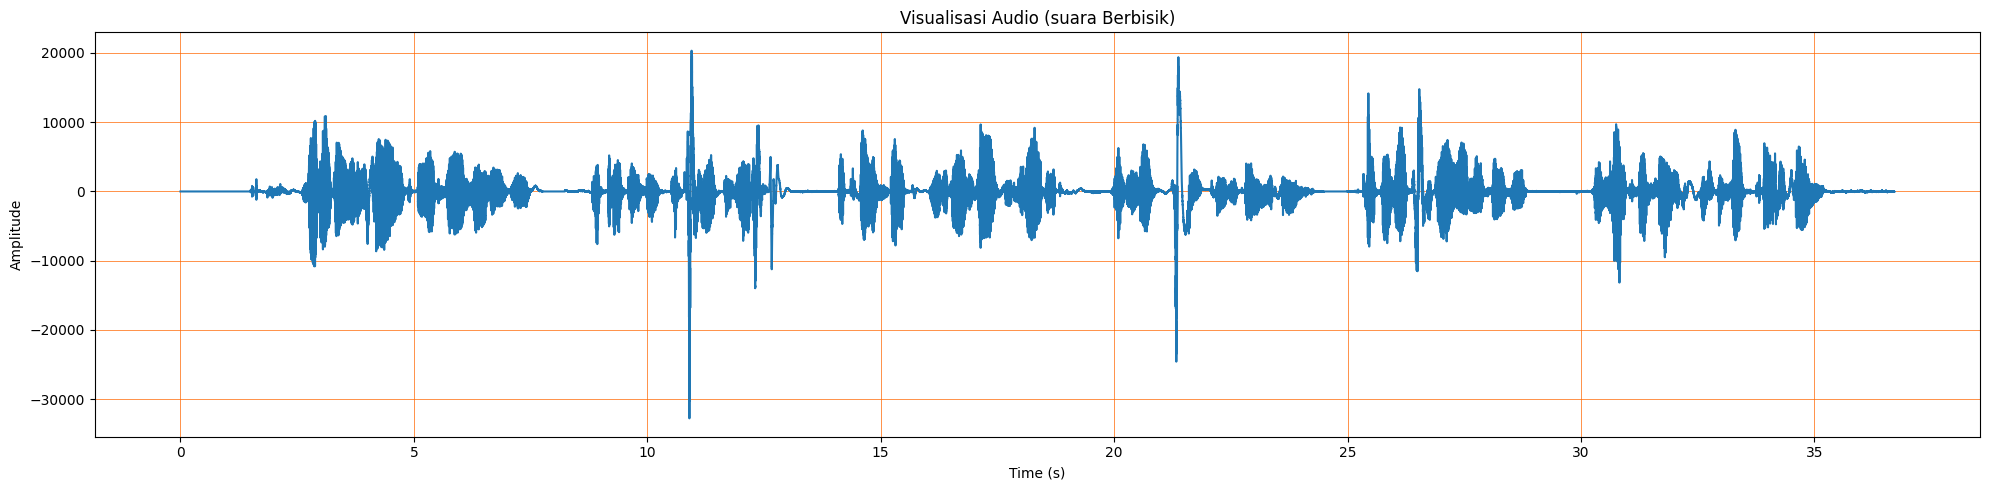

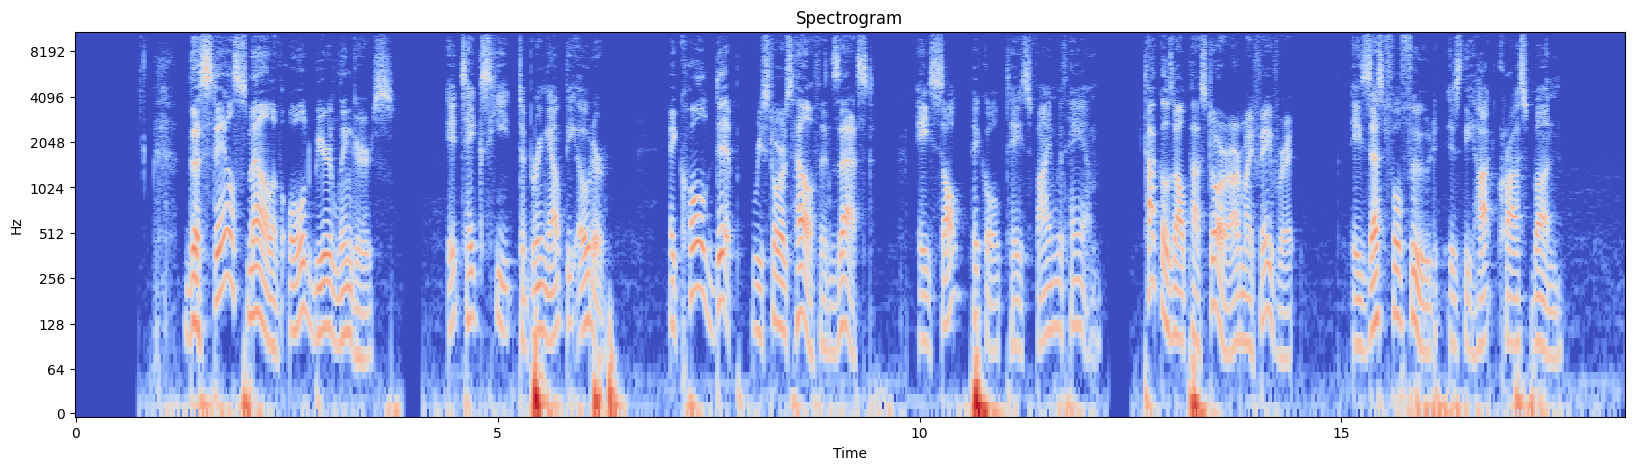

In [13]:
file_loc = os.path.join(os.getcwd(), 'file_suara', 'harvard.wav')
with wave.open(file_loc, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_info = np.frombuffer(frames, dtype=np.int16)
    frame_rate = wav_file.getframerate()
    time = np.linspace(0, len(sound_info) / frame_rate, num=len(sound_info))
    
    plt.figure(figsize=(20, 5))
    plt.plot(time, sound_info)
    plt.title('Visualisasi Audio (suara Berbisik)')
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    plt.grid(linewidth=0.5, color = '#FF6600')
    plt.tight_layout()
    plt.show()
    
    y, sr = librosa.load(file_loc)
    plt.figure(figsize=(20, 5))
    S = librosa.stft(y)
    S_db = librosa.amplitude_to_db(abs(S))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.title('Spectrogram')
    plt.show()

### Mari Belajar Melakukan Fading

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import os
import wave
from pydub import AudioSegment
from pydub.playback import play

d:\Aa\Kuliah\Mulmed\HO1\Multimedia-HO1\.venv\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


`import matplotlib.pyplot as plt`

Digunakan untuk membuat visualisasi data, seperti grafik, diagram, atau spektrum audio.
Dalam konteks audio processing, biasanya digunakan untuk menampilkan waveform, spektrogram, atau hasil analisis audio.

`import numpy as np`

Digunakan untuk manipulasi array dan operasi matematika, seperti pemrosesan sinyal dalam bentuk numerik.
Berguna dalam pengolahan data audio, misalnya untuk konversi format data dan perhitungan fitur.

`import librosa`

Perpustakaan untuk analisis dan pemrosesan audio, khususnya untuk ekstraksi fitur musik.
Contoh penggunaannya adalah membaca file audio, menampilkan spektrogram, atau ekstraksi fitur seperti MFCC (Mel-Frequency Cepstral Coefficients).

`import librosa.display`

Submodul dari librosa yang digunakan untuk menampilkan representasi visual dari data audio.
Biasanya dipakai untuk menggambar waveform, spektrogram, atau mel-spectrogram menggunakan matplotlib.

`import os`

Modul bawaan Python untuk operasi sistem, seperti mengakses file, membuat direktori, atau mengelola path.
Dalam konteks ini, biasanya digunakan untuk mencari, menyimpan, atau memuat file audio.

`import wave`

Modul untuk membaca dan menulis file audio dalam format WAV.
Bisa digunakan untuk mendapatkan informasi seperti jumlah channel, frame rate, atau durasi audio dalam file WAV.

`from pydub import AudioSegment`

Digunakan untuk memproses file audio, termasuk konversi format, pemotongan, atau penggabungan audio.
AudioSegment memungkinkan manipulasi audio dalam berbagai format seperti MP3, WAV, OGG, dll.

`from pydub.playback import play`

Memungkinkan pemutaran audio langsung dari kode Python.
Biasanya digunakan untuk memutar objek AudioSegment tanpa perlu menggunakan aplikasi pemutar audio eksternal.

In [15]:
# Muat file audio dari jalur tertentu
file_loc = os.path.join(os.getcwd(), 'file_suara', 'artorias.wav')
audio = AudioSegment.from_file(file_loc)

# Fungsi untuk menerapkan fading logaritmik
def logarithmic_fade(audio, fade_in=True, duration_ms=10000):
    steps = duration_ms // 10  # Setiap 10 ms langkah
    start_dB = -40.0 if fade_in else 0.0  # Mulai dari -40 dB untuk fade in
    end_dB = 0.0 if fade_in else -40.0  # Akhiri di 0 dB untuk fade in, atau turun ke -40 dB untuk fade out

    faded_audio = AudioSegment.silent(duration=0)  # Mulai dengan audio kosong

    for i in range(steps):
        volume_dB = start_dB + (end_dB - start_dB) * (1 - np.log10(i + 1) / np.log10(steps + 1))
        segment = audio[i * 10:(i + 1) * 10].apply_gain(volume_dB)  # Gunakan apply_gain() untuk perubahan volume
        faded_audio += segment  # Gabungkan setiap segmen audio

    return faded_audio

# Terapkan fade bawaan untuk perbandingan
faded_in_audio_builtin = audio.fade_in(10000)
faded_out_audio_builtin = audio.fade_out(10000)

# Terapkan fade logaritmik
faded_in_audio_log = logarithmic_fade(audio, fade_in=True, duration_ms=10000)
faded_out_audio_log = logarithmic_fade(audio, fade_in=False, duration_ms=10000)

# Tentukan jalur direktori untuk menyimpan file output
output_dir = os.path.join(os.getcwd(), 'outputaudio')
os.makedirs(output_dir, exist_ok=True)

# Simpan hasilnya
faded_in_audio_builtin.export(os.path.join(output_dir, 'faded_in_builtin.wav'), format="wav")
faded_out_audio_builtin.export(os.path.join(output_dir, 'faded_out_builtin.wav'), format="wav")
faded_in_audio_log.export(os.path.join(output_dir, 'faded_in_logarithmic.wav'), format="wav")
faded_out_audio_log.export(os.path.join(output_dir, 'faded_out_logarithmic.wav'), format="wav")

print("File audio dengan efek fade in dan fade out telah disimpan!")

File audio dengan efek fade in dan fade out telah disimpan!


### **Penjelasan Kode**
1. **Membaca file audio**
   ```python
   file_loc = os.path.join(os.getcwd(), 'file_suara', 'artorias.wav')
   audio = AudioSegment.from_file(file_loc)
   ```
   - `os.path.join(os.getcwd(), 'file_suara', 'artorias.wav')` digunakan untuk mendapatkan jalur absolut dari file audio yang disimpan dalam folder `file_suara`.
   - `AudioSegment.from_file(file_loc)` digunakan untuk memuat file audio ke dalam objek `AudioSegment` dari **pydub**.

2. **Fungsi untuk menerapkan fading logaritmik**
   ```python
   def logarithmic_fade(audio, fade_in=True, duration_ms=10000):
   ```
   - Fungsi ini menerapkan **fade in** atau **fade out** dengan perubahan volume yang lebih alami dibandingkan metode linear.
   - **Parameter:**
     - `audio`: File audio yang akan diproses.
     - `fade_in=True`: Menentukan apakah akan diterapkan **fade in** (jika `True`) atau **fade out** (jika `False`).
     - `duration_ms=10000`: Durasi fading dalam milidetik (default 10 detik).
   - **Langkah-langkah utama dalam fungsi:**
     - Membagi fading menjadi beberapa **step** per 10 milidetik (`steps = duration_ms // 10`).
     - Menghitung volume dalam **desibel (dB)** menggunakan rumus **logaritmik** untuk menghasilkan efek yang lebih alami.
     - Menggunakan `apply_gain()` untuk menerapkan perubahan volume setiap 10 ms.
     - Menggabungkan kembali segmen-segmen audio yang telah diproses.

3. **Penerapan efek fading menggunakan metode bawaan**
   ```python
   faded_in_audio_builtin = audio.fade_in(10000)
   faded_out_audio_builtin = audio.fade_out(10000)
   ```
   - `fade_in(10000)`: Menerapkan **fade in** secara linear selama 10 detik menggunakan fungsi bawaan **pydub**.
   - `fade_out(10000)`: Menerapkan **fade out** secara linear selama 10 detik.

4. **Penerapan efek fading menggunakan metode logaritmik**
   ```python
   faded_in_audio_log = logarithmic_fade(audio, fade_in=True, duration_ms=10000)
   faded_out_audio_log = logarithmic_fade(audio, fade_in=False, duration_ms=10000)
   ```
   - `logarithmic_fade(audio, fade_in=True, duration_ms=10000)`: Menerapkan **fade in** dengan pola perubahan volume **logaritmik** selama 10 detik.
   - `logarithmic_fade(audio, fade_in=False, duration_ms=10000)`: Menerapkan **fade out** dengan pola perubahan volume **logaritmik** selama 10 detik.

5. **Menyimpan file hasilnya**
   ```python
   output_dir = os.path.join(os.getcwd(), 'output')
   os.makedirs(output_dir, exist_ok=True)
   ```
   - Membuat direktori `output` jika belum ada.

   ```python
   faded_in_audio_builtin.export(os.path.join(output_dir, 'faded_in_builtin.wav'), format="wav")
   faded_out_audio_builtin.export(os.path.join(output_dir, 'faded_out_builtin.wav'), format="wav")
   faded_in_audio_log.export(os.path.join(output_dir, 'faded_in_logarithmic.wav'), format="wav")
   faded_out_audio_log.export(os.path.join(output_dir, 'faded_out_logarithmic.wav'), format="wav")
   ```
   - Menyimpan hasil audio dengan berbagai efek fading ke dalam file `.wav`.

6. **Menampilkan pesan bahwa proses selesai**
   ```python
   print("File audio dengan efek fade in dan fade out telah disimpan!")
   ```
   - Memberikan konfirmasi bahwa semua file telah diproses dan disimpan.

---

## Bagian 2: Equalizer

In [16]:
import wave
import os
import librosa
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

file_loc = os.path.join(os.getcwd(), 'file_suara', 'artorias.wav')
# Load audio with the original sampling rate
y, sr = librosa.load(file_loc, sr=None)
print(f"Sampling Rate: {sr}")

Sampling Rate: 44100


#### Penjelasan Kode Equalizer

Kode di atas merupakan langkah awal untuk implementasi equalizer pada file audio. Berikut adalah penjelasannya:

1. **Import Library**:
    - `wave`: Modul untuk membaca dan menulis file audio format WAV
    - `os`: Untuk operasi sistem seperti manipulasi path file
    - `librosa`: Library khusus untuk analisis dan pemrosesan audio

2. **Memuat File Audio**:
    - `os.path.join(os.getcwd(), 'file_suara', 'artorias.wav')`: Membuat path lengkap ke file audio 'artorias.wav' yang berada di folder 'file_suara'
    - `librosa.load(file_loc)`: Memuat file audio dan mengembalikan dua nilai:
      - `y`: Array NumPy yang berisi data audio (waveform) yang telah diubah ke format floating-point mono
      - `sr`: Sampling rate yang digunakan untuk merepresentasikan audio

3. **Pengaturan Parameter Pemuatan**:
    - Parameter `sr=None` pada fungsi `librosa.load(file_loc, sr=None)` sangat penting karena:
        - Mempertahankan sampling rate asli dari file audio
        - Tidak melakukan resampling yang dapat mengubah karakteristik asli audio
        - Memastikan analisis equalizer dilakukan pada kualitas audio yang sebenarnya
        - Menghindari distorsi atau perubahan yang tidak diinginkan pada konten frekuensi

4. **Konfirmasi Sampling Rate**:
    - `print(f"Sampling Rate: {sr}")`: Menampilkan sampling rate dari file audio yang dimuat
    - Informasi ini penting untuk melakukan perhitungan yang tepat dalam proses equalizer, terutama saat menentukan band frekuensi

Kode ini adalah tahap persiapan sebelum melakukan pemrosesan equalizer pada audio, dimana data audio diubah menjadi representasi numerik yang dapat dimanipulasi menggunakan teknik pemrosesan sinyal digital.

---

#### Melakukan High Pass Filter

High pass filter adalah filter audio yang hanya melewatkan sinyal dengan frekuensi di atas frekuensi cutoff yang ditentukan, sambil meredam sinyal dengan frekuensi di bawahnya. Filter ini berguna untuk:

- Menghilangkan noise frekuensi rendah (rumble, hum)
- Memperjelas suara-suara bernada tinggi
- Mengurangi "muddiness" pada rekaman audio
- Memisahkan instrumen bernada tinggi dalam mixing musik

Dalam implementasinya, high pass filter menggunakan persamaan matematis tertentu (seperti filter Butterworth) untuk menentukan seberapa tajam pemotongan frekuensi rendah yang dilakukan. Parameter Q factor mengontrol resonansi filter di sekitar titik cutoff, dengan nilai Q yang lebih tinggi membuat transisi antara frekuensi yang diloloskan dan diredam menjadi lebih tajam.

Filter ini diimplementasikan menggunakan fungsi dari `scipy.signal` dengan parameter:
- Cutoff frequency: batas frekuensi di mana filter mulai bekerja (dalam Hz)

High pass filter sering digunakan dalam mastering audio, membersihkan rekaman vokal, dan meningkatkan kejernihan suara secara umum.

In [17]:
def high_pass_filter(audio_data, sr, cutoff=1000):
    import scipy.signal as signal
    
    nyquist = 0.5 * sr
    normal_cutoff = cutoff / nyquist
    
    # Fixed order at 2
    b, a = signal.butter(2, normal_cutoff, btype='high', analog=False, output='ba')
    filtered_audio = signal.lfilter(b, a, audio_data)
    
    return filtered_audio

#### Penjelasan Kode High Pass Filter

Fungsi `high_pass_filter` ini digunakan untuk memfilter audio agar hanya frekuensi tinggi yang dilewatkan, sedangkan frekuensi rendah diredam. Berikut penjelasannya:

1. **Input Parameter**:
    - `audio_data`: Data audio yang akan difilter
    - `sr`: Sampling rate audio (berapa sampel per detik)
    - `order`: Tingkat kecuraman filter (semakin tinggi semakin tajam pemotongannya)
    - `cutoff`: Frekuensi batas (dalam Hz) dimana frekuensi di bawahnya akan diredam
    - `q`: Faktor kualitas yang mengontrol resonansi filter

2. **Proses**:
    - Menghitung frekuensi Nyquist (setengah dari sampling rate)
    - Menormalisasi frekuensi cutoff dengan membaginya dengan frekuensi Nyquist
    - Membuat filter Butterworth dengan tipe 'high' (high pass)
    
3. **Penerapan Filter**:
    - Jika q tidak sama dengan 1.0, filter menggunakan format second-order sections (SOS) dan memodifikasi resonansi
    - Jika q sama dengan 1.0, menggunakan filter standar dengan koefisien b dan a
    
4. **Output**:
    - Mengembalikan audio yang sudah difilter dimana frekuensi rendah telah dihilangkan

Filter ini berguna untuk menghilangkan noise frekuensi rendah dan memperjelas suara-suara bernada tinggi dalam rekaman audio.

In [18]:
# Apply high pass filter to the audio
hpassed_audio = high_pass_filter(y, sr, cutoff=500)

**Plotting dan Komparasi Hasil**

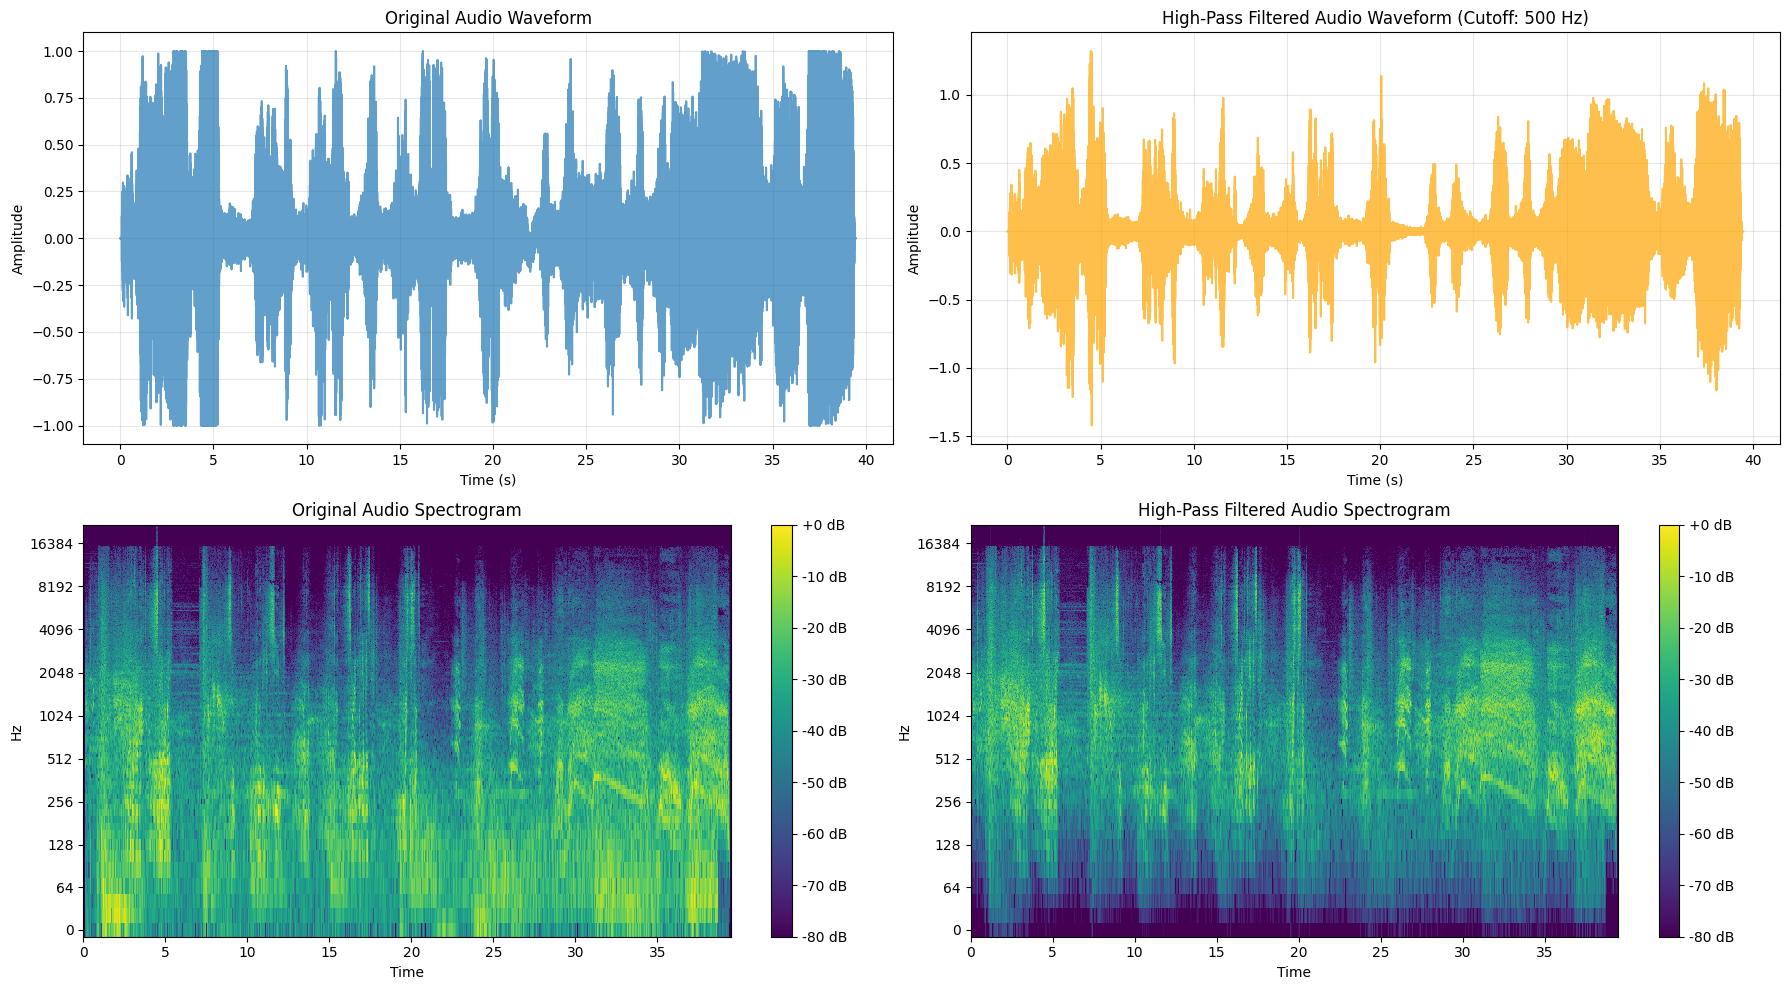

In [19]:
# Visualize the original and high-pass filtered audio
plt.figure(figsize=(18, 10))

# Time axis for plotting
time_axis = np.linspace(0, len(y) / sr, len(y))

# Plot the waveform comparison
plt.subplot(2, 2, 1)
plt.plot(time_axis, y, label='Original', alpha=0.7)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(time_axis, hpassed_audio, label='High-Pass Filtered', color='orange', alpha=0.7)
plt.title('High-Pass Filtered Audio Waveform (Cutoff: 500 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

# Calculate and plot the spectrogram of the original audio
plt.subplot(2, 2, 3)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Calculate and plot the spectrogram of the high-pass filtered audio
plt.subplot(2, 2, 4)
D_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(hpassed_audio)), ref=np.max)
librosa.display.specshow(D_filtered, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('High-Pass Filtered Audio Spectrogram')

plt.tight_layout()
plt.show()


**Menyimpan file audio**

In [20]:
# Save the filtered audio
output_path = os.path.join('output', 'high_pass_filtered.wav')
sf.write(output_path, hpassed_audio, sr)
print(f"Filtered audio saved to {output_path}")

LibsndfileError: Error opening 'output\\high_pass_filtered.wav': System error.

- Coba dengarkan hasil audio yang sudah di high-pass filter. Apakah Anda bisa mendengar perbedaannya?
- Coba ubah nilai `cutoff` dan `q` untuk melihat efeknya terhadap audio.

#### Melakukan Low Pass Filter

In [ ]:
def low_pass_filter(audio_data, sr, cutoff=1000):
    import scipy.signal as signal
    
    nyquist = 0.5 * sr
    normal_cutoff = cutoff / nyquist
    
    b, a = signal.butter(2, normal_cutoff, btype='low', analog=False, output='ba')
    filtered_audio = signal.lfilter(b, a, audio_data)
    
    return filtered_audio

In [ ]:
# Apply low pass filter to the audio
lpassed_audio = low_pass_filter(y, sr, cutoff=1000)

In [ ]:
# Visualize the original and low-pass filtered audio
plt.figure(figsize=(18, 10))

# Time axis for plotting
time_axis = np.linspace(0, len(y) / sr, len(y))

# Plot the waveform comparison
plt.subplot(2, 2, 1)
plt.plot(time_axis, y, label='Original', alpha=0.7)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(time_axis, lpassed_audio, label='Low-Pass Filtered', color='green', alpha=0.7)
plt.title('Low-Pass Filtered Audio Waveform (Cutoff: 1000 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

# Calculate and plot the spectrogram of the original audio
plt.subplot(2, 2, 3)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Calculate and plot the spectrogram of the low-pass filtered audio
plt.subplot(2, 2, 4)
D_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(lpassed_audio)), ref=np.max)
librosa.display.specshow(D_filtered, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Low-Pass Filtered Audio Spectrogram')

plt.tight_layout()
plt.show()


In [ ]:
# Save the low-pass filtered audio
output_path = os.path.join('output', 'low_pass_filtered.wav')

sf.write(output_path, lpassed_audio, sr)
print(f"Low-pass filtered audio saved to {output_path}")

#### Melakukan Band Pass Filter

In [ ]:
def band_pass_filter(audio_data, sr, lowcut=500, highcut=2000):
    
    nyquist = 0.5 * sr
    low = lowcut / nyquist
    high = highcut / nyquist
    
    # Create a bandpass Butterworth filter
    b, a = signal.butter(2, [low, high], btype='band', analog=False, output='ba')
    
    # Apply the filter
    filtered_audio = signal.lfilter(b, a, audio_data)
    
    return filtered_audio

In [ ]:
# Apply band pass filter to the audio
bpassed_audio = band_pass_filter(y, sr, lowcut=500, highcut=2000)

In [ ]:
# Visualize the original and band-pass filtered audio
plt.figure(figsize=(18, 10))

# Plot the waveform comparison
plt.subplot(2, 2, 1)
plt.plot(time_axis, y, label='Original', alpha=0.7)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(time_axis, bpassed_audio, label='Band-Pass Filtered', color='purple', alpha=0.7)
plt.title('Band-Pass Filtered Audio Waveform (500-2000 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

# Calculate and plot the spectrogram of the original audio
plt.subplot(2, 2, 3)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Calculate and plot the spectrogram of the band-pass filtered audio
plt.subplot(2, 2, 4)
D_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(bpassed_audio)), ref=np.max)
librosa.display.specshow(D_filtered, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Band-Pass Filtered Audio Spectrogram')

plt.tight_layout()
plt.show()


In [ ]:

# Save the band-pass filtered audio
output_path = os.path.join('output', 'band_pass_filtered.wav')
sf.write(output_path, bpassed_audio, sr)

---

## Bagian 3: Membuat Suara Chipmunk (Pitch Shifting)

In [ ]:
import wave
import os
import librosa
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

file_loc = os.path.join(os.getcwd(), 'file_suara', 'harvard.wav')
# Load audio with the original sampling rate
y, sr = librosa.load(file_loc, sr=None)
print(f"Sampling Rate: {sr}")

In [ ]:
# Define a function to create a chipmunk effect
def create_chipmunk_voice(audio_data, sr, pitch_steps=7):
    # Using librosa's pitch_shift function
    chipmunk_audio = librosa.effects.pitch_shift(
        audio_data, 
        sr=sr, 
        n_steps=pitch_steps,
        bins_per_octave=12
    )
    return chipmunk_audio

#### Penjelasan Fungsi Chipmunk Voice

Fungsi `create_chipmunk_voice` digunakan untuk menghasilkan efek suara chipmunk (seperti suara tupai) pada file audio. Berikut cara kerjanya:

**Parameter Fungsi**
- `audio_data`: Data audio yang akan dimodifikasi (dalam bentuk numpy array)
- `sr`: Sampling rate dari audio (berapa sampel per detik)
- `pitch_steps`: Jumlah langkah pergeseran pitch (default: 7)

**Proses yang Terjadi**
1. Fungsi memanfaatkan `librosa.effects.pitch_shift` untuk menggeser pitch audio
2. Parameter `n_steps=pitch_steps` menentukan berapa banyak "semitones" pitch akan digeser ke atas
3. `bins_per_octave=12` mengindikasikan bahwa satu oktaf dibagi menjadi 12 bins (sesuai dengan 12 nada dalam teori musik)
4. Semakin tinggi nilai `pitch_steps`, semakin tinggi pitch yang dihasilkan

**Hasil**
- Fungsi mengembalikan audio yang telah dimodifikasi dengan pitch lebih tinggi
- Efek yang dihasilkan mirip dengan suara chipmunk/tupai yang karakteristik

**Catatan Teknis**
- Pergeseran pitch dilakukan tanpa mengubah panjang/durasi audio
- Proses ini menggunakan phase vocoder algorithm untuk modifikasi sinyal

In [ ]:
# Apply chipmunk effect (higher pitch)
chipmunk_voice = create_chipmunk_voice(y, sr, pitch_steps=7)

**Visualisasi**

In [ ]:

# Visualize the original and pitch-shifted audio
plt.figure(figsize=(18, 10))

# Create a new time axis for the current audio file
time_axis = np.linspace(0, len(y) / sr, len(y))

# Plot waveforms
plt.subplot(2, 2, 1)
plt.plot(time_axis, y, label='Original')
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(time_axis[:len(chipmunk_voice)], chipmunk_voice, label='Chipmunk Voice', color='red')
plt.title('Chipmunk Voice Waveform (Pitch Up)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

# Calculate and plot the spectrogram of the original audio
plt.subplot(2, 2, 3)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Calculate and plot the spectrogram of the chipmunk voice
plt.subplot(2, 2, 4)
D_chipmunk = librosa.amplitude_to_db(np.abs(librosa.stft(chipmunk_voice)), ref=np.max)
librosa.display.specshow(D_chipmunk, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Chipmunk Voice Spectrogram')

plt.tight_layout()
plt.show()


**Save Audio**

In [ ]:

# Save the chipmunk voice audio
output_path = os.path.join('output', 'chipmunk_voice.wav')
sf.write(output_path, chipmunk_voice, sr)
print(f"Chipmunk voice saved to {output_path}")

## Bagian 4: Melakukan Kompresi Audio dan Normalisasi ke Target LUFS

In [ ]:
import wave
import os
import librosa
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf
import pyloudnorm as pyln

file_loc = os.path.join(os.getcwd(), 'file_suara', 'suara_pelan.wav')
# Load audio with the original sampling rate
y, sr = librosa.load(file_loc, sr=None)
print(f"Sampling Rate: {sr}")

#### Kompresi Audio

In [ ]:
def audio_compression(audio_data, threshold_db=-20.0, ratio=4.0, attack_ms=5.0, release_ms=50.0):

    # Convert to linear amplitude
    threshold = 10 ** (threshold_db / 20.0)
    
    # Calculate attack and release coefficients
    attack_coef = np.exp(-1.0 / (sr * attack_ms / 1000.0))
    release_coef = np.exp(-1.0 / (sr * release_ms / 1000.0))
    
    # Initialize the envelope
    envelope = np.zeros_like(audio_data)
    gain = np.ones_like(audio_data)
    
    # Apply compression
    for i in range(len(audio_data)):
        # Calculate envelope using peak detection
        current_amplitude = np.abs(audio_data[i])
        if i == 0:
            envelope[i] = current_amplitude
        else:
            if current_amplitude > envelope[i-1]:  # Attack phase
                envelope[i] = attack_coef * envelope[i-1] + (1 - attack_coef) * current_amplitude
            else:  # Release phase
                envelope[i] = release_coef * envelope[i-1] + (1 - release_coef) * current_amplitude
        
        # Calculate gain reduction
        if envelope[i] > threshold:
            slope = (1 - 1/ratio)
            gain_reduction_db = slope * (20 * np.log10(envelope[i]) - threshold_db)
            gain[i] = 10 ** (-gain_reduction_db / 20.0)
        else:
            gain[i] = 1.0
    
    # Apply gain to the audio
    compressed_audio = audio_data * gain
    
    return compressed_audio

#### Penjelasan Fungsi Kompresi Audio

Fungsi `audio_compression` digunakan untuk melakukan kompresi dinamis pada sinyal audio. Berikut penjelasan cara kerjanya:

**Parameter Input:**
- `audio_data`: Data audio yang akan dikompresi
- `threshold_db`: Batas ambang dalam decibel (default: -20.0 dB) 
- `ratio`: Rasio kompresi (default: 4.0)
- `attack_ms`: Waktu attack dalam milidetik (default: 5.0 ms)
- `release_ms`: Waktu release dalam milidetik (default: 50.0 ms)

**Proses Kompresi:**
1. Konversi threshold dari dB ke amplitudo linear
2. Hitung koefisien attack dan release berdasarkan sampling rate
3. Inisialisasi envelope detection dan gain array
4. Untuk setiap sampel audio:
    - Deteksi amplitudo puncak
    - Terapkan fase attack jika amplitudo naik
    - Terapkan fase release jika amplitudo turun
    - Jika envelope melebihi threshold:
      - Hitung pengurangan gain menggunakan rasio kompresi
      - Terapkan gain reduction
    - Jika di bawah threshold, gain tetap 1.0
5. Terapkan gain ke audio untuk menghasilkan sinyal terkompresi

**Output:**
- Mengembalikan sinyal audio yang telah dikompresi

Kompressor ini bekerja dengan mengurangi gain secara dinamis ketika sinyal melebihi threshold, menghasilkan range dinamis yang lebih sempit dan suara yang lebih seragam volumenya.

**Gunakan Fungsi Kompresi**

In [ ]:
compressed_audio = audio_compression(y, threshold_db=-40.0, ratio=4.0)

**Visualisasi**

In [ ]:
# Visualize the original and compressed audio
plt.figure(figsize=(18, 10))

# Time axis for visualization
time_axis = np.linspace(0, len(y) / sr, len(y))

# Plot original audio waveform
plt.subplot(2, 2, 1)
plt.plot(time_axis, y)
plt.title('Original Audio Waveform')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.xlim(0, len(y)/sr)
plt.ylim(-1, 1)  # Set consistent y-axis limits

# Plot compressed audio waveform
plt.subplot(2, 2, 2)
plt.plot(time_axis, compressed_audio, color='orange')
plt.title('Compressed Audio Waveform') 
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.xlim(0, len(compressed_audio)/sr)
plt.ylim(-1, 1)  # Set consistent y-axis limits

# Original audio spectrogram
plt.subplot(2, 2, 3)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Compressed audio spectrogram
plt.subplot(2, 2, 4)
D_compressed = librosa.amplitude_to_db(np.abs(librosa.stft(compressed_audio)), ref=np.max)
librosa.display.specshow(D_compressed, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Compressed Audio Spectrogram')

plt.tight_layout()
plt.show()


**Save Audio**

In [ ]:
# Save the compressed audio
output_path = os.path.join('output', 'compressed_audio.wav')
sf.write(output_path, compressed_audio, sr)
print(f"Compressed audio saved to {output_path}")

#### Normalisasi Audio (Mengangkat Level Audio)

In [ ]:
def normalize_audio(audio_data, gain_db=6.0):
    # Convert dB to linear gain
    gain_linear = 10 ** (gain_db / 20.0)
    
    # Apply gain
    normalized_audio = audio_data * gain_linear
    
    # Clip to prevent distortion
    normalized_audio = np.clip(normalized_audio, -1.0, 1.0)
    
    return normalized_audio

#### Penjelasan Fungsi `normalize_audio`

Fungsi ini digunakan untuk menormalisasi level audio dengan menerapkan gain dalam desibel (dB). Berikut penjelasan baris per baris:

1. **Parameter Input**:
    - `audio_data`: Array NumPy berisi sampel audio yang akan dinormalisasi
    - `gain_db`: Nilai gain dalam desibel yang akan diterapkan (default: 6.0 dB)

2. **Konversi dB ke Gain Linear**:
    ```python
    gain_linear = 10 ** (gain_db / 20.0)
    ```
    - Mengubah gain dari skala dB ke skala linear menggunakan rumus: gain_linear = 10^(dB/20)
    - Contoh: 6 dB = 10^(6/20) ≈ 2x amplifikasi

3. **Penerapan Gain**:
    ```python
    normalized_audio = audio_data * gain_linear
    ```
    - Mengalikan setiap sampel audio dengan nilai gain linear
    - Meningkatkan atau menurunkan amplitudo sinyal secara seragam

4. **Clipping Prevention**:
    ```python
    normalized_audio = np.clip(normalized_audio, -1.0, 1.0)
    ```
    - Membatasi nilai audio antara -1.0 dan 1.0
    - Mencegah distorsi dengan memotong sinyal yang melebihi batas
    - Penting untuk menjaga kualitas audio

**Menerapkan Normalisasi**

In [ ]:
normalized_audio = normalize_audio(compressed_audio, gain_db=20.0)

**Visualisasi dan Perbandingan**

In [ ]:
plt.figure(figsize=(20, 15))

# Original Audio - Waveform
plt.subplot(2, 3, 1)
plt.plot(time_axis, y, color='blue')
plt.title('Original Audio Waveform')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.xlim(0, len(y)/sr)
plt.ylim(-1, 1)

# Compressed Audio - Waveform
plt.subplot(2, 3, 2)
plt.plot(time_axis, compressed_audio, color='orange')
plt.title('Compressed Audio Waveform')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.xlim(0, len(compressed_audio)/sr)
plt.ylim(-1, 1)

# Normalized Audio - Waveform
plt.subplot(2, 3, 3)
plt.plot(time_axis, normalized_audio, color='green')
plt.title('Normalized Audio Waveform')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.xlim(0, len(normalized_audio)/sr)
plt.ylim(-1, 1)

# Original Audio - Spectrogram
plt.subplot(2, 3, 4)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Compressed Audio - Spectrogram
plt.subplot(2, 3, 5)
librosa.display.specshow(D_compressed, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Compressed Audio Spectrogram')

# Calculate and plot the spectrogram of the normalized audio
plt.subplot(2, 3, 6)
D_normalized = librosa.amplitude_to_db(np.abs(librosa.stft(normalized_audio)), ref=np.max)
librosa.display.specshow(D_normalized, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Normalized Audio Spectrogram')

plt.tight_layout()
plt.show()

In [ ]:
# Save the normalized audio
output_path = os.path.join('output', 'normalized_audio.wav')
sf.write(output_path, normalized_audio, sr)
print(f"Normalized audio saved to {output_path}")

#### Memeriksa Nilai LUFS

In [ ]:
def estimate_loudness(audio_data, sr):

    
    # Create meter
    meter = pyln.Meter(sr)  # Using BS.1770-4 standard
    
    # Measure loudness
    loudness = meter.integrated_loudness(audio_data)
    
    return loudness


In [ ]:
# Check LUFS values for each audio stage
original_loudness = estimate_loudness(y, sr)
compressed_loudness = estimate_loudness(compressed_audio, sr)
normalized_loudness = estimate_loudness(normalized_audio, sr)

print(f"Original audio LUFS: {original_loudness:.2f}")
print(f"Compressed audio LUFS: {compressed_loudness:.2f}")
print(f"Normalized audio LUFS: {normalized_loudness:.2f}")

---
# <center>Tugas Hands On - 1
> Baca dengen seksama dan teliti

</center>

### Soal 1
- Rekamlah suara Anda sendiri selama 20 detik dimana anda membaca sebuah teks berita.
- Dalam 20 detik rekaman tersebut, anda harus merekam:
    - 5 detik pertama: membaca dengan suara sangat pelan dan berbisik
    - 5 detik kedua: membaca dengan suara normal
    - 5 detik ketiga: membaca dengan suara keras
    - 5 detik terakhir: membaca dengan suara cempreng (dibuat-buat cempreng)
    - 5 detik terakhir: membaca dengan suara berteriak
- Rekam dalam format WAV (atau konversikan ke WAV sebelum dimuat ke notebook ini).
- Visualisasikan waveform dan spektogram dari rekaman suara anda
- Sertakan penjelasan singkat mengenai hasil visualisasi tersebut.

### Soal 2
- Cari musik dengan durasi kurang dari 30 detik tanpa efek fading di awal dan akhirnya.
- Terapkan teknik fading pada bagian awal dan akhir musik tersebut.

### Soal 3
- Rekam suara Anda berbicara di sekitar objek yang berisik (seperti kipas angin, AC, atau mesin).
    - Rekaman tersebut harus berdurasi kurang lebih 10 detik.
    - Rekam dalam format WAV (atau konversikan ke WAV sebelum dimuat ke notebook ini).
- Gunakan filter equalisasi (high-pass, low-pass, dan band-pass) untuk menghilangkan noise pada rekaman tersebut.
- Lakukan eksperimen dengan berbagai nilai frekuensi cutoff:
- Visualisasikan hasil dari tiap filter dan bandingkan spektrogramnya.
- Jelaskan:
    - Jenis noise yang muncul pada rekaman Anda
    - Filter mana yang paling efektif untuk mengurangi noise tersebut
    - Nilai cutoff yang memberikan hasil terbaik
    - Bagaimana kualitas suara (kejelasan ucapan) setelah proses filtering

### Soal 4
- Lakukan pitch shifting pada rekaman suara Soal 1 untuk membuat suara terdengar seperti chipmunk (dengan mengubah pitch ke atas).
- Visualisasikan waveform dan spektrogram sebelum dan sesudah pitch shifting.
- Jelaskan proses pitch shifting yang Anda lakukan, termasuk:
    - Parameter yang digunakan
    - Perbedaan dalam representasi visual antara suara asli dan suara yang telah dimodifikasi
    - Bagaimana perubahan pitch memengaruhi kualitas dan kejelasan suara
- Gunakan dua buat pitch tinggi, misalnya pitch +7 dan pitch +12.
- Gabungkan kedua rekaman yang telah di-pitch shift ke dalam satu file audio. (Gunakan ChatGPT / AI untuk membantu Anda dalam proses ini)

### Soal 5
- Lakukan normalisasi dan loudness optimization pada rekaman yang sudah di-pitch shift pada Soal 4.
- Atur nilai target loudness ke -18 LUFS (Loudness Unit Full Scale).
- Visualisasikan waveform dan spektrogram sebelum dan sesudah proses normalisasi.
- Jelaskan:
    - Perubahan dinamika suara yang terjadi
    - Perbedaan antara normalisasi peak dan normalisasi LUFS
    - Bagaimana kualitas suara berubah setelah proses normalisasi dan loudness optimization
    - Kelebihan dan kekurangan dari pengoptimalan loudness dalam konteks rekaman suara

### Aturan Umum Pengerjaan
- Kerjakan secara mandiri; bantuan AI (seperti GPT, Copilot, dsb.) diperbolehkan. Jika menggunakan AI, wajib menyertakan bukti percakapan dengan AI tersebut (dapat berupa screenshot / url link percakapan / script percakapan).
- Source code antar mahasiswa harus berbeda untuk menghindari plagiarisme.
- Jika mendapat bantuan teman, wajib mencantumkan nama dan NIM teman yang membantu.
- Jika terbukti melakukan plagiarisme, akan dikenakan sanksi sesuai aturan yang berlaku di ITERA.
- Cantumkan seluruh credit dan referensi yang Anda gunakan dalam project ini pada bagian akhir notebook ini.

### Aturan Pengumpulan
- Render keseluruhan notebook yang sudah dikerjakan dalam format .pdf (jangan merender notebook praktikum ini, buat notebook baru)
- Kumpulkan .pdf dan .ipynb melalui link yang ada di web perkuliahan
- Unggah seluruh audio (asli dan hasil modifikasi) yang Anda gunakan dalam pengerjaan tugas ini pada Google Drive / One Drive, lalu sertakan linknya di dalam notebook Anda pada bagian awal.
- Pastikan notebook telah di-run sebelum disave dan dikumpulkan